In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.layers import Conv1D,MaxPool1D,GRU,Bidirectional,TimeDistributed
from tensorflow.keras.optimizers import Adam


In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score

In [4]:
train_df = pd.read_csv('train_FD003.txt', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

train_df = train_df.sort_values(['id','cycle'])
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


In [5]:
test_df = pd.read_csv('test_FD003.txt', sep=" ", header=None)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,521.89,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,521.85,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,522.10,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,522.45,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,521.91,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16596 entries, 0 to 16595
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        16596 non-null  int64  
 1   cycle     16596 non-null  int64  
 2   setting1  16596 non-null  float64
 3   setting2  16596 non-null  float64
 4   setting3  16596 non-null  float64
 5   s1        16596 non-null  float64
 6   s2        16596 non-null  float64
 7   s3        16596 non-null  float64
 8   s4        16596 non-null  float64
 9   s5        16596 non-null  float64
 10  s6        16596 non-null  float64
 11  s7        16596 non-null  float64
 12  s8        16596 non-null  float64
 13  s9        16596 non-null  float64
 14  s10       16596 non-null  float64
 15  s11       16596 non-null  float64
 16  s12       16596 non-null  float64
 17  s13       16596 non-null  float64
 18  s14       16596 non-null  float64
 19  s15       16596 non-null  float64
 20  s16       16596 non-null  fl

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24720 entries, 0 to 24719
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        24720 non-null  int64  
 1   cycle     24720 non-null  int64  
 2   setting1  24720 non-null  float64
 3   setting2  24720 non-null  float64
 4   setting3  24720 non-null  float64
 5   s1        24720 non-null  float64
 6   s2        24720 non-null  float64
 7   s3        24720 non-null  float64
 8   s4        24720 non-null  float64
 9   s5        24720 non-null  float64
 10  s6        24720 non-null  float64
 11  s7        24720 non-null  float64
 12  s8        24720 non-null  float64
 13  s9        24720 non-null  float64
 14  s10       24720 non-null  float64
 15  s11       24720 non-null  float64
 16  s12       24720 non-null  float64
 17  s13       24720 non-null  float64
 18  s14       24720 non-null  float64
 19  s15       24720 non-null  float64
 20  s16       24720 non-null  fl

In [8]:
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
rul.head()

,id,max
0,1,233
1,2,124
2,3,234
3,4,68
4,5,138


In [9]:
pm_truth=pd.read_csv('RUL_FD003.txt',sep=' ',header=None).drop([1],axis=1)
pm_truth.columns=['more']
pm_truth['id']=pm_truth.index+1
pm_truth.head()


,more,id
0,44,1
1,51,2
2,27,3
3,120,4
4,101,5


In [10]:
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
rul.head()


,id,max
0,1,233
1,2,124
2,3,234
3,4,68
4,5,138


In [11]:
pm_truth['rtf']=pm_truth['more']+rul['max']
pm_truth.head()

,more,id,rtf
0,44,1,277
1,51,2,175
2,27,3,261
3,120,4,188
4,101,5,239


In [12]:
pm_truth.drop('more', axis=1, inplace=True)
test_df=test_df.merge(pm_truth,on=['id'],how='left')
test_df['ttf']=test_df['rtf'] - test_df['cycle']

In [13]:
features_col_name=['setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11',
                   's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
target_col_name='label_bc'

In [14]:
test_df.drop('rtf', axis=1, inplace=True)
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,2387.94,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,276
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,2388.01,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,275
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,2387.94,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,274
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,2387.96,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,273
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,2387.97,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,272


In [15]:
train_df['ttf'] = train_df.groupby(['id'])['cycle'].transform(max)-train_df['cycle']
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,ttf
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,258
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,257
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,256
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,255
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,254


In [16]:
df_train=train_df.copy()
df_test=test_df.copy()
period=30
df_train['label_bc'] = df_train['ttf'].apply(lambda x: 1 if x <= period else 0)
df_test['label_bc'] = df_test['ttf'].apply(lambda x: 1 if x <= period else 0)
df_train


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bc
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537,258,0
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491,257,0
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669,256,0
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951,255,0
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583,254,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24715,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,4,1
24716,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,3,1
24717,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,2,1
24718,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,1,1


In [17]:
df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bc
0,1,1,-0.0017,-0.0004,100.0,518.67,641.94,1581.93,1396.93,14.62,...,8133.48,8.3760,0.03,391,2388,100.0,39.07,23.4468,276,0
1,1,2,0.0006,-0.0002,100.0,518.67,642.02,1584.86,1398.90,14.62,...,8137.44,8.4062,0.03,391,2388,100.0,39.04,23.4807,275,0
2,1,3,0.0014,-0.0003,100.0,518.67,641.68,1581.78,1391.92,14.62,...,8138.25,8.3553,0.03,391,2388,100.0,39.10,23.4244,274,0
3,1,4,0.0027,0.0001,100.0,518.67,642.20,1584.53,1395.34,14.62,...,8137.07,8.3709,0.03,392,2388,100.0,38.97,23.4782,273,0
4,1,5,-0.0001,0.0001,100.0,518.67,642.46,1589.03,1395.86,14.62,...,8134.20,8.4146,0.03,391,2388,100.0,39.09,23.3950,272,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,100,243,0.0011,-0.0003,100.0,518.67,643.04,1594.99,1411.28,14.62,...,8162.24,8.2939,0.03,395,2388,100.0,39.40,23.4949,32,0
16592,100,244,-0.0024,0.0002,100.0,518.67,642.47,1591.27,1417.64,14.62,...,8163.24,8.3247,0.03,394,2388,100.0,39.42,23.6011,31,0
16593,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482,30,1
16594,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687,29,1


In [18]:
train_failure=df_train[df_train['label_bc']==0]
test_failure=df_test[df_test['label_bc']==0]

train_nonfail=df_train[df_train['label_bc']==1]
test_nonfail=df_test[df_test['label_bc']==1]

train_failure.shape,test_failure.shape,train_nonfail.shape,test_nonfail.shape


((21620, 28), (16305, 28), (3100, 28), (291, 28))

In [19]:
train_failure=train_failure.sample(train_nonfail.shape[0],random_state=42)
train_failure.shape,train_nonfail.shape

((3100, 28), (3100, 28))

In [20]:
test_failure=test_failure.sample(test_nonfail.shape[0],random_state=42)
test_failure.shape

(291, 28)

In [21]:
df_train=pd.concat([train_failure,train_nonfail],ignore_index=True)
df_train

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bc
0,4,95,-0.0013,0.0003,100.0,518.67,642.49,1588.08,1408.55,14.62,...,8124.72,8.4512,0.03,395,2388,100.0,38.86,23.2759,177,0
1,11,66,-0.0000,0.0002,100.0,518.67,641.92,1575.50,1392.44,14.62,...,8131.82,8.3584,0.03,390,2388,100.0,39.01,23.4670,131,0
2,17,223,0.0028,0.0000,100.0,518.67,642.74,1587.83,1394.02,14.62,...,8139.49,8.3681,0.03,392,2388,100.0,39.14,23.4604,89,0
3,55,341,0.0008,-0.0004,100.0,518.67,641.87,1580.56,1393.26,14.62,...,8134.95,8.3681,0.03,391,2388,100.0,39.02,23.3001,184,0
4,94,61,-0.0011,0.0001,100.0,518.67,642.61,1588.05,1400.24,14.62,...,8145.06,8.3278,0.03,393,2388,100.0,39.38,23.5589,331,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,100,148,-0.0016,-0.0003,100.0,518.67,643.78,1596.01,1424.11,14.62,...,8138.08,8.5036,0.03,394,2388,100.0,38.44,22.9631,4,1
6196,100,149,0.0034,-0.0003,100.0,518.67,643.29,1596.38,1429.14,14.62,...,8144.36,8.5174,0.03,395,2388,100.0,38.50,22.9746,3,1
6197,100,150,-0.0016,0.0004,100.0,518.67,643.84,1604.53,1431.41,14.62,...,8135.95,8.5223,0.03,396,2388,100.0,38.39,23.0682,2,1
6198,100,151,-0.0023,0.0004,100.0,518.67,643.94,1597.56,1426.57,14.62,...,8141.24,8.5148,0.03,395,2388,100.0,38.31,23.0753,1,1


In [22]:
df_test=pd.concat([test_failure,test_nonfail],ignore_index=True)
df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bc
0,66,84,0.0004,-0.0004,100.0,518.67,642.67,1588.87,1412.82,14.62,...,8133.03,8.4423,0.03,393,2388,100.0,38.79,23.2812,125,0
1,82,69,-0.0014,0.0004,100.0,518.67,641.64,1586.08,1399.54,14.62,...,8137.80,8.3802,0.03,392,2388,100.0,39.22,23.4764,131,0
2,18,112,0.0025,0.0004,100.0,518.67,641.53,1588.95,1392.73,14.62,...,8134.85,8.3897,0.03,389,2388,100.0,39.08,23.3152,264,0
3,8,109,-0.0010,-0.0005,100.0,518.67,643.02,1589.67,1404.92,14.62,...,8132.52,8.4319,0.03,393,2388,100.0,38.79,23.2346,138,0
4,64,129,-0.0006,0.0005,100.0,518.67,641.86,1584.91,1391.70,14.62,...,8133.14,8.4126,0.03,389,2388,100.0,38.97,23.3823,170,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,99,288,0.0007,-0.0002,100.0,518.67,643.26,1596.97,1425.21,14.62,...,8187.08,8.2162,0.03,394,2388,100.0,39.64,23.6941,9,1
578,99,289,0.0013,0.0002,100.0,518.67,642.78,1597.57,1419.47,14.62,...,8185.00,8.2459,0.03,397,2388,100.0,39.59,23.7059,8,1
579,100,245,-0.0053,0.0002,100.0,518.67,642.70,1593.81,1412.70,14.62,...,8162.12,8.3264,0.03,394,2388,100.0,39.43,23.5482,30,1
580,100,246,-0.0006,0.0001,100.0,518.67,642.19,1595.63,1406.58,14.62,...,8164.20,8.2908,0.03,395,2388,100.0,39.40,23.6687,29,1


In [23]:
df_train['label_bc'].value_counts()

0    3100
1    3100
Name: label_bc, dtype: int64

In [24]:
df_test['label_bc'].value_counts()

0    291
1    291
Name: label_bc, dtype: int64

In [25]:
X_train=df_train.drop('label_bc',axis=1)
y_train=df_train['label_bc']
X_train,y_train

(       id  cycle  setting1  setting2  setting3      s1      s2       s3  \
 0       4     95   -0.0013    0.0003     100.0  518.67  642.49  1588.08   
 1      11     66   -0.0000    0.0002     100.0  518.67  641.92  1575.50   
 2      17    223    0.0028    0.0000     100.0  518.67  642.74  1587.83   
 3      55    341    0.0008   -0.0004     100.0  518.67  641.87  1580.56   
 4      94     61   -0.0011    0.0001     100.0  518.67  642.61  1588.05   
 ...   ...    ...       ...       ...       ...     ...     ...      ...   
 6195  100    148   -0.0016   -0.0003     100.0  518.67  643.78  1596.01   
 6196  100    149    0.0034   -0.0003     100.0  518.67  643.29  1596.38   
 6197  100    150   -0.0016    0.0004     100.0  518.67  643.84  1604.53   
 6198  100    151   -0.0023    0.0004     100.0  518.67  643.94  1597.56   
 6199  100    152    0.0000    0.0003     100.0  518.67  643.64  1599.04   
 
            s4     s5  ...      s13      s14     s15   s16  s17   s18    s19  \
 0    

In [26]:
X_test=df_test.drop('label_bc',axis=1)
y_test=df_test['label_bc']

In [27]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [29]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
X_train.shape,X_test.shape

((6200, 27, 1), (582, 27, 1))

In [30]:
epochs=10
model=Sequential()


model.add(Bidirectional(GRU(100, return_sequences=True)))
model.add(Dropout(0.15))


model.add(Bidirectional(GRU(100, return_sequences=False)))
model.add(Dropout(0.15)) 


model.add(Dense(1,activation='linear'))



In [31]:
'''epochs=20

model = Sequential()
model.add(GRU(input_shape=(seq_length, nb_features),units=100, activation='tanh', return_sequences=True))
model.add(Dropout(0.15))  # Dropout overfitting

# model.add(GRU(layers[2],activation='tanh', return_sequences=True))
# model.add(Dropout(0.2))  # Dropout overfitting

model.add(GRU(100, activation='tanh', return_sequences=True))
model.add(Dropout(0.15))  # Dropout overfitting

model.add(GRU(100, activation='tanh', return_sequences=True))
model.add(Dropout(0.15))  # Dropout overfitting

#model.add(GRU(64, activation='tanh', return_sequences=True))
#model.add(Dropout(0.15))  # Dropout overfitting

model.add(GRU(100, activation='tanh', return_sequences=False))
model.add(Dropout(0.15))  # Dropout overfitting


model.add(Dense(units=nb_out))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='rmsprop',metrics=[rmse,r2_keras])

print(model.summary())'''

'epochs=20\n\nmodel = Sequential()\nmodel.add(GRU(input_shape=(seq_length, nb_features),units=100, activation=\'tanh\', return_sequences=True))\nmodel.add(Dropout(0.15))  # Dropout overfitting\n\n# model.add(GRU(layers[2],activation=\'tanh\', return_sequences=True))\n# model.add(Dropout(0.2))  # Dropout overfitting\n\nmodel.add(GRU(100, activation=\'tanh\', return_sequences=True))\nmodel.add(Dropout(0.15))  # Dropout overfitting\n\nmodel.add(GRU(100, activation=\'tanh\', return_sequences=True))\nmodel.add(Dropout(0.15))  # Dropout overfitting\n\n#model.add(GRU(64, activation=\'tanh\', return_sequences=True))\n#model.add(Dropout(0.15))  # Dropout overfitting\n\nmodel.add(GRU(100, activation=\'tanh\', return_sequences=False))\nmodel.add(Dropout(0.15))  # Dropout overfitting\n\n\nmodel.add(Dense(units=nb_out))\nmodel.add(Activation("linear"))\nmodel.compile(loss=\'mean_squared_error\', optimizer=\'rmsprop\',metrics=[rmse,r2_keras])\n\nprint(model.summary())'

In [32]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
history=model.fit(X_train,y_train ,epochs=epochs,validation_data=(X_test,y_test),verbose=1,batch_size=32)

Epoch 1/10
194/194 [==============================] - 47s 127ms/step - loss: 0.5828 - accuracy: 0.7121 - val_loss: 0.1346 - val_accuracy: 0.9639
Epoch 2/10
194/194 [==============================] - 20s 104ms/step - loss: 0.4020 - accuracy: 0.8916 - val_loss: 0.1294 - val_accuracy: 0.9639
Epoch 3/10
194/194 [==============================] - 20s 101ms/step - loss: 0.2078 - accuracy: 0.9385 - val_loss: 0.0932 - val_accuracy: 0.9742
Epoch 4/10
194/194 [==============================] - 19s 100ms/step - loss: 0.2341 - accuracy: 0.9355 - val_loss: 0.0690 - val_accuracy: 0.9691
Epoch 5/10
194/194 [==============================] - 19s 99ms/step - loss: 0.2495 - accuracy: 0.9181 - val_loss: 0.0887 - val_accuracy: 0.9742
Epoch 6/10
194/194 [==============================] - 19s 98ms/step - loss: 0.1582 - accuracy: 0.9550 - val_loss: 0.0900 - val_accuracy: 0.9622
Epoch 7/10
194/194 [==============================] - 20s 101ms/step - loss: 0.1453 - accuracy: 0.9560 - val_loss: 0.0837 - val_accu

In [34]:
acc=model.evaluate(X_train,y_train)
print("Accuracy=",acc[1])#0.9646773934364319 0.5->0.2

194/194 [==============================] - 6s 30ms/step - loss: 0.0950 - accuracy: 0.9665
Accuracy= 0.9664515852928162


In [35]:
def plot_lc(history,epochs):
    epoch_range=range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title("model accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.legend(["train","val"],loc='upper left')
    plt.show()
    
    
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title("model loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend(["train","val"],loc='upper left')
    plt.show()

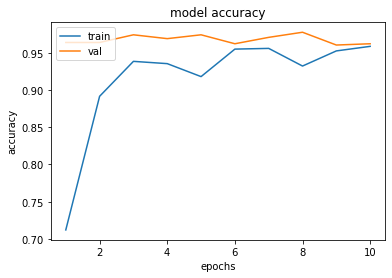

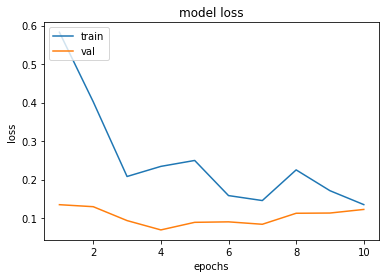

In [36]:
plot_lc(history,epochs)


In [37]:
y_pred=(model.predict(X_test)>0.5).astype("int32")
print('Accuracy of model on test data: ',accuracy_score(y_test,y_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))


19/19 [==============================] - 5s 26ms/step
Accuracy of model on test data:  0.9621993127147767
Confusion Matrix: 
 [[290   1]
 [ 21 270]]


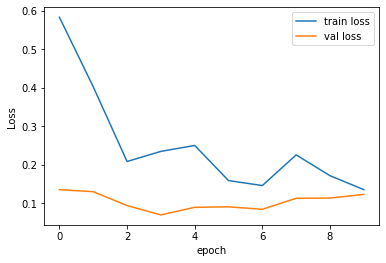

In [38]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [39]:
from tensorflow.keras.utils import plot_model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 27, 200)          61800     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 27, 200)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              181200    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 243,201
Trainable params: 243,201
Non-trai

In [40]:
model.evaluate(X_test,y_test)

19/19 [==============================] - 1s 27ms/step - loss: 0.1222 - accuracy: 0.9622


[0.12222348898649216, 0.962199330329895]